In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
# Evotion of salaries per position
# Group salaries by year + position
# 1.Data cleaning - extraction of players' position 
# 2. Plotting

In [78]:
#nba_player_performance_per_season_with_salaries.csv
df = pd.read_csv('nba_player_performance_per_season_with_salaries.csv')
df.head(3)

,Unnamed: 0,PLAYER_ID,RANK,PLAYER,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,career_WS,career_eFG%,draft_year,height,name,position,weight,salary,season_end,season_start
0,0,893,1,Michael Jordan,82,3144,837,1625,0.515,9,...,214.0,50.9,1984.0,6-6,Michael Jordan,Small Forward and Shooting Guard,195lb,550000.0,1985.0,1984.0
1,1,78615,14,Orlando Woolridge,77,2816,679,1225,0.554,0,...,53.0,51.4,1981.0,6-9,Orlando Woolridge,Small Forward,215lb,300000.0,1985.0,1984.0
2,2,76497,49,Quintin Dailey,79,2101,525,1111,0.473,7,...,12.7,45.6,1982.0,6-3,Quintin Dailey,Shooting Guard,180lb,410000.0,1985.0,1984.0


In [79]:
# Dropping the Unnamed column 
df.drop(['Unnamed: 0'], axis = 1).head(3)

,PLAYER_ID,RANK,PLAYER,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,career_WS,career_eFG%,draft_year,height,name,position,weight,salary,season_end,season_start
0,893,1,Michael Jordan,82,3144,837,1625,0.515,9,52,...,214.0,50.9,1984.0,6-6,Michael Jordan,Small Forward and Shooting Guard,195lb,550000.0,1985.0,1984.0
1,78615,14,Orlando Woolridge,77,2816,679,1225,0.554,0,5,...,53.0,51.4,1981.0,6-9,Orlando Woolridge,Small Forward,215lb,300000.0,1985.0,1984.0
2,76497,49,Quintin Dailey,79,2101,525,1111,0.473,7,30,...,12.7,45.6,1982.0,6-3,Quintin Dailey,Shooting Guard,180lb,410000.0,1985.0,1984.0


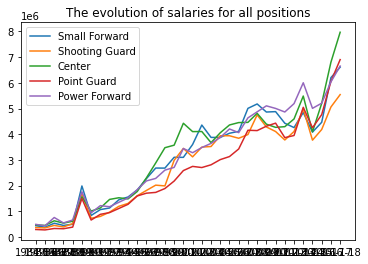

In [113]:
avg_salary_team_year = df.groupby(['YEAR','main_position'])['salary'].mean().reset_index()

#plotting the graph for salaries per position
for pos in [x for x in df['main_position'].unique() if x != 'nan']:
    df_plt = avg_salary_team_year[avg_salary_team_year['main_position']==pos].groupby(['YEAR'])['salary'].sum()
    plt.plot(df_plt,label = '%s'%pos)
plt.legend()
plt.title(f"The evolution of salaries for all positions")
plt.show()
#df_plt.plot.bar()

In [87]:
#Salaries per year and position, and grouping by year
position_salaries = df.groupby(['YEAR', 'position'])['salary'].sum().reset_index()
position_salaries


,YEAR,position,salary
0,1984-85,Center,12449000.0
1,1984-85,Center and Power Forward,6248000.0
2,1984-85,Point Guard,4908000.0
3,1984-85,Point Guard and Shooting Guard,3719000.0
4,1984-85,Power Forward,6101000.0
...,...,...,...
780,2017-18,Small Forward and Power Forward,98489966.0
781,2017-18,Small Forward and Power Forward and Shooting G...,10000000.0
782,2017-18,Small Forward and Shooting Guard,166033660.0
783,2017-18,Small Forward and Shooting Guard and Point Guard,20421148.0


In [100]:

position_salaries1 = df.groupby(['YEAR', 'position'])['salary'].mean().reset_index()
position_salaries1

,YEAR,position,salary
0,1984-85,Center,4.610741e+05
1,1984-85,Center and Power Forward,4.806154e+05
2,1984-85,Point Guard,2.887059e+05
3,1984-85,Point Guard and Shooting Guard,2.860769e+05
4,1984-85,Power Forward,4.067333e+05
...,...,...,...
780,2017-18,Small Forward and Power Forward,7.576151e+06
781,2017-18,Small Forward and Power Forward and Shooting G...,1.000000e+07
782,2017-18,Small Forward and Shooting Guard,9.766686e+06
783,2017-18,Small Forward and Shooting Guard and Point Guard,1.021057e+07


In [83]:
#Extracting players position
df["main_position"] = df["position"].apply((lambda x: str(x).split(' and ')[0]))
print(df["main_position"])

0         Small Forward
1         Small Forward
2        Shooting Guard
3                Center
4                Center
              ...      
14501     Small Forward
14502       Point Guard
14503       Point Guard
14504               nan
14505     Small Forward
Name: main_position, Length: 14506, dtype: object


In [88]:
# grouping on the main position of the players
position_salaries = df.groupby(['YEAR','main_position'])['salary'].sum().reset_index()

In [89]:
position_salaries

,YEAR,main_position,salary
0,1984-85,Center,18697000.0
1,1984-85,Point Guard,8627000.0
2,1984-85,Power Forward,19488000.0
3,1984-85,Shooting Guard,12705000.0
4,1984-85,Small Forward,13526000.0
...,...,...,...
199,2017-18,Point Guard,628293372.0
200,2017-18,Power Forward,618705702.0
201,2017-18,Shooting Guard,581898557.0
202,2017-18,Small Forward,502454081.0


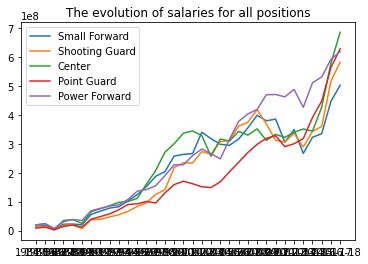

In [99]:
#plotting the graph for salaries per position
for pos in [x for x in df['main_position'].unique() if x != 'nan']:
    df_plt = df[df['main_position']==pos].groupby(['YEAR'])['salary'].sum()
    plt.plot(df_plt,label = '%s'%pos)
plt.legend()
plt.title(f"The evolution of salaries for all positions")
plt.show()
#df_plt.plot.bar()